<a href="https://colab.research.google.com/github/CalCorbin/machine-learning-mentorship/blob/main/Cal's_Lesson_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Simple Linear Regression



> y = mx + b







In [ ]:
rng = np.random.RandomState(6)
X = 10 * rng.rand(10)
y = 2 * X + 5 + rng.randn(10)

In [ ]:
print(X)
print(y)

[8.92860151 3.31979805 8.21229123 0.41696626 1.0765668  5.95052064
 5.29817362 4.18807429 3.35407849 6.22519432]
[24.49649411 11.2097025  24.05586302  6.43575476  6.81725198 18.13877913
 15.70747541 13.50529982 11.7842846  17.29526049]


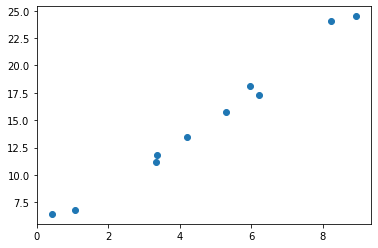

In [ ]:
plt.scatter(X, y)

In [ ]:
y_pred1 = 3*X + 2
y_pred2 = 2.5*X + 4

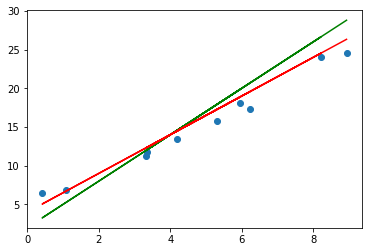

In [ ]:
plt.plot(X, y_pred1, 'green')
plt.plot(X, y_pred2, 'red')
plt.scatter(X, y)

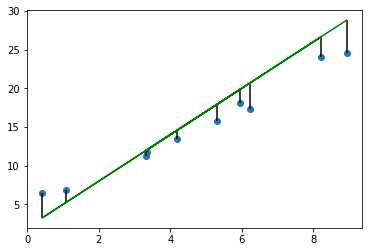

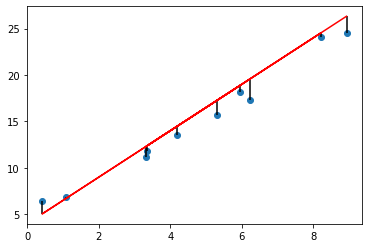

In [ ]:
plt.plot(X, y_pred1, 'green')
plt.scatter(X, y)
plt.vlines(X, ymin=[min(i,j) for i,j in zip(y, y_pred1)], ymax=[max(i,j) for i,j in zip(y, y_pred1)])
plt.show()

plt.plot(X, y_pred2, 'red')
plt.scatter(X, y)
plt.vlines(X, ymin=[min(i,j) for i,j in zip(y, y_pred2)], ymax=[max(i,j) for i,j in zip(y, y_pred2)])

### Metrics

Mean Absolute Error (MAE): $$\frac{abs(y - y_{pred})}{N}$$

In [ ]:
pred1_mae = np.mean(np.abs(y - y_pred1))
pred2_mae = np.mean(np.abs(y - y_pred2))
pred1_mae, pred2_mae

(2.1009444991854354, 1.1017845439059708)

Mean Squared Error (MSE): $$\frac{(y - y_{pred})^2}{N}$$

In [ ]:
pred1_mse = np.mean((y - y_pred1)**2)
pred2_mse = np.mean((y - y_pred2)**2)
pred1_mse, pred2_mse

(5.862741288639592, 1.6044967363925644)

Root Mean Squared Error (RMSE): $$\sqrt{\frac{(y - y_{pred})^2}{N}}$$

In [ ]:
pred1_rmse = np.sqrt(np.mean((y - y_pred1)**2))
pred2_rmse = np.sqrt(np.mean((y - y_pred2)**2))
pred1_rmse, pred2_rmse

(2.4213098291295956, 1.2666873080569507)

### Which to choose?

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
y_true = [1, 3, 5, 8, 9]
y_pred = [2, 5, 7, 9, 10]
mean_absolute_error(y_true, y_pred), mean_squared_error(y_true, y_pred), np.sqrt(mean_squared_error(y_true, y_pred))

(1.4, 2.2, 1.4832396974191326)

In [ ]:
y_true = [1, 3, 5, 8, 9]
y_pred = [4, 10, 14, 18, 20] ## doubled
mean_absolute_error(y_true, y_pred), mean_squared_error(y_true, y_pred), np.sqrt(mean_squared_error(y_true, y_pred))

(8.0, 72.0, 8.48528137423857)

In [ ]:
y_true = [1, 3, 5, 8, 9]
y_pred = [2, 5, 7, 9, 100] ## one outlier
mean_absolute_error(y_true, y_pred), mean_squared_error(y_true, y_pred), np.sqrt(mean_squared_error(y_true, y_pred))

(19.4, 1658.2, 40.72100195230957)

### Sklearn models

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
print(X.shape)
print(y.shape)
X2d = X.reshape(-1, 1)
y2d = y.reshape(-1, 1)
print(X2d)
print(y2d)

(10,)
(10,)
[[8.92860151]
 [3.31979805]
 [8.21229123]
 [0.41696626]
 [1.0765668 ]
 [5.95052064]
 [5.29817362]
 [4.18807429]
 [3.35407849]
 [6.22519432]]
[[24.49649411]
 [11.2097025 ]
 [24.05586302]
 [ 6.43575476]
 [ 6.81725198]
 [18.13877913]
 [15.70747541]
 [13.50529982]
 [11.7842846 ]
 [17.29526049]]


In [ ]:
lr = LinearRegression()
lr.fit(X2d, y2d)

LinearRegression()

In [ ]:
lr.fit(X.reshape(-1, 1), y)

In [ ]:
lr.coef_, lr.intercept_

(array([[2.2378811]]), array([4.43322972]))

In [ ]:
y_pred = lr.predict(X.reshape(-1, 1))

In [ ]:
mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred)

(0.5570027468282943, 0.48739776542519725)

### Multiple linear regression

> y = m1 * x1 + m2 * x2 + m3 * x3 + b

In [ ]:
X1 = 10 * rng.rand(100)
X2 = 10 * rng.rand(100)
X3 = 10 * rng.rand(100)
y = 2*X1 + 3*X2 - 4*X3 + 3 + rng.randn(100)

In [ ]:
## fit a model, check predicted coefficients + intercept, and evaluate

In [ ]:
## Fit the model
lr = LinearRegression()
xCombined = np.stack((X1, X2, X3), axis=1)
lr.fit(xCombined, y)

LinearRegression()

In [ ]:
## Check predicated Coefficients
lr.coef_, lr.intercept_

(array([ 1.97072376,  2.9915669 , -3.99355489]), 3.291553206342824)

In [ ]:
## Evaluate
y_pred = lr.predict(xCombined)
mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred)

(0.7493396741795445, 0.9232672602835212)

### Interactions

In [ ]:
X1 = 10 * np.sort(rng.rand(100))
X2 = 10 * np.sort(rng.rand(100))
X3 = 10 * np.sort(rng.rand(100))
y = 2*X1 + 3*X2 - 4*X3 - 2.5*X1*X2 + 3*X2/X3 + 3 + rng.randn(100)

In [ ]:
## fit a model, check predicted coefficients + intercept, and evaluate

In [ ]:
## Fit a model
lr = LinearRegression()
xStack = np.stack((X1, X2, X3, X1*X2, X2/X3), axis=1)
lr.fit(xStack, y)

LinearRegression()

In [ ]:
## Check predicted coefficients and intercept
lr.coef_, lr.intercept_

(array([ 1.17598556,  3.30639579, -3.71106973, -2.48548726,  3.04420689]),
 3.282554898058393)

In [ ]:
y_pred = lr.predict(xStack)
mean_absolute_error(y, y_pred), mean_squared_error(y, y_pred)

(0.8371977689063891, 1.0800956493299454)

### Real world example

In [ ]:
## https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [ ]:
## load into dataframe
import pandas as pd

df = pd.DataFrame(data=data['data'], columns=data['feature_names'])

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [ ]:
## add target 
df['target'] = data['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [ ]:
y_pred = lr.predict(X)
mean_absolute_error(y, y_pred)

43.27739508374988

Add an interaction term

In [ ]:
df['s1*s2'] = df['s1']*df['s2']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,s1*s2
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,0.001540
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,0.000162
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,0.001559
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,0.000305
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,0.000061


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)
mean_absolute_error(y, y_pred)

43.27548971747457

Add all interaction terms

In [ ]:
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['target'] = data['target']

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
data['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
for i in range(len(data['feature_names'])):
  column1 = data['feature_names'][i]
  for j in range(i+1, len(data['feature_names'])):
    column2 = data['feature_names'][j]
    df[f'{column1}*{column2}'] = df[column1]*df[column2]


df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,s2*s3,s2*s4,s2*s5,s2*s6,s3*s4,s3*s5,s3*s6,s4*s5,s4*s6,s5*s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,...,0.001511,0.000090,-0.000693,0.000614,0.000113,-0.000864,0.000766,-0.000052,0.000046,-0.000351
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,...,-0.001426,0.000757,0.001309,0.001767,-0.002939,-0.005085,-0.006861,0.002699,0.003641,0.006300
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,...,0.001106,0.000089,-0.000098,0.000887,0.000084,-0.000093,0.000839,-0.000007,0.000067,-0.000074
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,...,-0.000901,0.000857,0.000567,-0.000234,-0.001236,-0.000818,0.000337,0.000779,-0.000321,-0.000212
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,...,0.000127,-0.000040,-0.000499,-0.000727,-0.000021,-0.000260,-0.000380,0.000083,0.000121,0.001492


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)
mean_absolute_error(y, y_pred)

39.49449744194202

This is better, right?

### Overfitting vs Underfitting

<img src="https://static.packt-cdn.com/products/9781838556334/graphics/C12624_07_02.jpg">

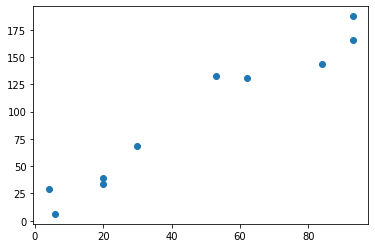

In [ ]:
X = rng.randint(0,100,10)
y = [2*i + 5 + 20*rng.randn() for i in X]

plt.scatter(X, y)

In [ ]:
lr = LinearRegression()
lr.fit(np.stack([X, X**2, X**3, X**4, X**5], axis=1), y)

LinearRegression()

In [ ]:
lr.coef_, lr.intercept_

(array([-8.52388568e+00,  5.97390737e-01, -1.22396311e-02,  1.00730527e-04,
        -2.78135113e-07]), 47.40324293751368)

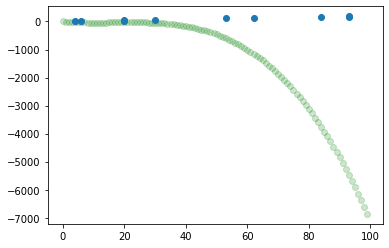

In [ ]:
X_ = [i for i in range(100)]
y_ = [i*lr.coef_[0] + (i**2)*lr.coef_[1] + (i**3)*lr.coef_[2] + (i**2)*lr.coef_[3] + (i**3)*lr.coef_[4] for i in X_]

plt.scatter(X_, y_, c='green', alpha=0.2)
plt.scatter(X, y)

### Train test split

Set aside some data that won't be trained upon to simulate "new" data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
df['target'] = data['target']

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(353, 89, 353, 89)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

mean_absolute_error(y_train, y_pred_train),mean_absolute_error(y_test, y_pred_test)

(43.30392023784017, 45.92340386668974)

In [ ]:
df_train = pd.DataFrame(data=X_train, columns=data['feature_names'])
df_train['target'] = y_train

df_test = pd.DataFrame(data=X_test, columns=data['feature_names'])
df_test['target'] = y_test

In [ ]:
for i in range(len(data['feature_names'])):
  column1 = data['feature_names'][i]
  for j in range(i+1, len(data['feature_names'])):
    column2 = data['feature_names'][j]
    df_train[f'{column1}*{column2}'] = df_train[column1]*df_train[column2]

df_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,s2*s3,s2*s4,s2*s5,s2*s6,s3*s4,s3*s5,s3*s6,s4*s5,s4*s6,s5*s6
44,0.045341,0.050680,0.068163,0.008101,-0.016704,0.004636,-0.076536,0.071210,0.032433,-0.017646,...,-0.000355,0.000330,0.000150,-0.000082,-0.005450,-0.002482,0.001351,0.002310,-0.001257,-0.000572
379,-0.001882,-0.044642,-0.038540,0.021872,-0.108893,-0.115613,0.022869,-0.076395,-0.046879,0.023775,...,-0.002644,0.008832,0.005420,-0.002749,-0.001747,-0.001072,0.000544,0.003581,-0.001816,-0.001115
179,-0.023677,-0.044642,-0.015906,-0.012556,0.020446,0.041274,-0.043401,0.034309,0.014072,-0.009362,...,-0.001791,0.001416,0.000581,-0.000386,-0.001489,-0.000611,0.000406,0.000483,-0.000321,-0.000132
85,0.045341,-0.044642,0.071397,0.001215,-0.009825,-0.001001,0.015505,-0.039493,-0.041180,-0.071494,...,-0.000016,0.000040,0.000041,0.000072,-0.000612,-0.000639,-0.001109,0.001626,0.002824,0.002944
322,0.023546,0.050680,0.061696,0.062039,0.024574,-0.036073,-0.091262,0.155345,0.133396,0.081764,...,0.003292,-0.005604,-0.004812,-0.002950,-0.014177,-0.012174,-0.007462,0.020722,0.012702,0.010907


In [ ]:
for i in range(len(data['feature_names'])):
  column1 = data['feature_names'][i]
  for j in range(i+1, len(data['feature_names'])):
    column2 = data['feature_names'][j]
    df_test[f'{column1}*{column2}'] = df_test[column1]*df_test[column2]

df_test.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,...,s2*s3,s2*s4,s2*s5,s2*s6,s3*s4,s3*s5,s3*s6,s4*s5,s4*s6,s5*s6
291,0.074401,-0.044642,0.018584,0.063187,0.061725,0.042840,0.008142,-0.002592,0.058039,-0.059067,...,0.000349,-0.000111,0.002486,-0.002530,-0.000021,0.000473,-0.000481,-0.000150,0.000153,-0.003428
175,0.067136,-0.044642,-0.038540,-0.026328,-0.031840,-0.026366,0.008142,-0.039493,-0.027129,0.003064,...,-0.000215,0.001041,0.000715,-0.000081,-0.000322,-0.000221,0.000025,0.001071,-0.000121,-0.000083
182,0.045341,0.050680,0.005650,0.056301,0.064477,0.089186,-0.039719,0.071210,0.015567,-0.009362,...,-0.003542,0.006351,0.001388,-0.000835,-0.002828,-0.000618,0.000372,0.001109,-0.000667,-0.000146
328,-0.038207,-0.044642,0.067085,-0.060757,-0.029088,-0.023234,-0.010266,-0.002592,-0.001499,0.019633,...,0.000239,0.000060,0.000035,-0.000456,0.000027,0.000015,-0.000202,0.000004,-0.000051,-0.000029
309,-0.009147,0.050680,0.001339,-0.002228,0.079612,0.070084,0.033914,-0.002592,0.026714,0.081764,...,0.002377,-0.000182,0.001872,0.005730,-0.000088,0.000906,0.002773,-0.000069,-0.000212,0.002184


In [ ]:
X_train_interactions = df_train.drop('target', axis=1)
X_test_interactions = df_test.drop('target', axis=1)


lr = LinearRegression()
lr.fit(X_train_interactions, y_train)

y_pred_train = lr.predict(X_train_interactions)
y_pred_test = lr.predict(X_test_interactions)

mean_absolute_error(y_train, y_pred_train),mean_absolute_error(y_test, y_pred_test)

(38.73332742892447, 48.42696607183981)

## Homework

California Housing Dataset


1.   Load dataset - https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset
2.   Train test split
3.   Fit baseline model
4.   Add features/interactions
5.   Build best model without overfitting



In [ ]:
## Create model that most accurately predict house prices